In [1]:
%matplotlib inline


# Feature importances with forests of trees


This program shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The green bars are the feature
importances of the forest, along with their inter-trees variability.



Automatically created module for IPython interactive environment

Feature ranking:
1. Attribute 19 (0.085242)
2. Attribute 11 (0.069858)
3. Attribute 20 (0.063211)
4. Attribute 18 (0.063017)
5. Attribute 17 (0.057544)
6. Attribute 9 (0.053032)
7. Attribute 29 (0.051074)
8. Attribute 40 (0.041891)
9. Attribute 12 (0.041825)
10. Attribute 26 (0.040262)
11. Attribute 39 (0.037546)
12. Attribute 5 (0.037369)
13. Attribute 28 (0.030495)
14. Attribute 16 (0.030066)
15. Attribute 38 (0.027775)
16. Attribute 30 (0.027525)
17. Attribute 36 (0.027174)
18. Attribute 14 (0.024833)
19. Attribute 8 (0.022703)
20. Attribute 35 (0.018800)
21. Attribute 4 (0.017071)
22. Attribute 15 (0.014383)
23. Attribute 1 (0.013925)
24. Attribute 34 (0.013849)
25. Attribute 25 (0.011971)
26. Attribute 2 (0.010725)
27. Attribute 37 (0.010716)
28. Attribute 33 (0.009294)
29. Attribute 13 (0.008391)
30. Attribute 24 (0.006885)
31. Attribute 21 (0.005289)
32. Attribute 27 (0.004740)
33. Attribute 23 (0.004031)
34. Attr

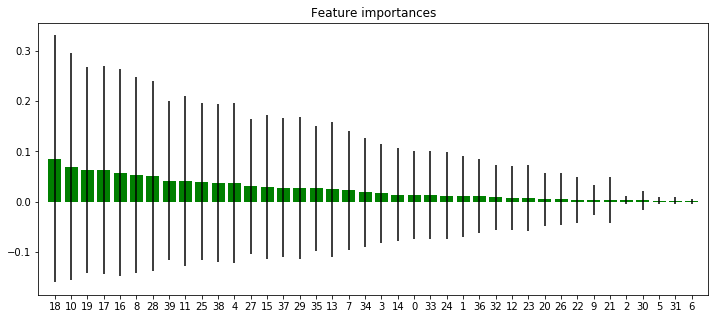

In [2]:
print(__doc__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

divorce = pd.read_csv('divorce-csv.csv')
X = divorce.drop('Class', axis=1)
X = X.drop(X.iloc[:, 40:], axis = 1) 
y = divorce['Class']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("\nFeature ranking:")

for f in range(X.shape[1]):
    print("%d. Attribute %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()